In [2]:
%load_ext lab_black
import pandas as pd
import numpy as np

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [3]:
from plotnine import *

In [4]:
ship_pop = pd.read_csv("..\..\Mid-Semester Project\SHIPMENT_merge_v2.csv")
# ship_pop = pd.read_csv("..\20_intermediate_files\SHIPMENT_merge_v2.csv")

In [5]:
ship_pop.describe()

,YEAR/MONTH,MME/CAP,checker,final_checker
count,55314.000000,55314.000000,55314.000000,55314.000000
mean,63232.583903,0.033877,78.382435,81.485953
std,77824.718162,0.077334,19.459055,13.684465
min,2006.000000,0.000000,1.000000,7.000000
25%,20081.000000,0.012500,84.000000,84.000000
50%,20105.000000,0.020600,84.000000,84.000000
75%,20129.000000,0.031300,84.000000,84.000000
max,201212.000000,2.279100,84.000000,84.000000


In [14]:
ship_pop.head()

,BUYER_STATE,BUYER_COUNTY,YEAR/MONTH,FULL_STATES,MME/CAP,checker,final_checker,PolicyState,Post
0,FL,ALACHUA,2006,Florida,0.3449,7.0,7,True,False
1,FL,ALACHUA,2007,Florida,0.3925,7.0,7,True,False
2,FL,ALACHUA,2008,Florida,0.4683,7.0,7,True,False
3,FL,ALACHUA,2009,Florida,0.5728,7.0,7,True,False
4,FL,ALACHUA,2010,Florida,0.6101,7.0,7,True,True


In [15]:
FL_compare = ["FL", "LA", "MS", "SC"]
FL_year = 2010
states = ship_pop.loc[ship_pop.PolicyState == True, "BUYER_STATE"].unique()

In [83]:
FL_data = ship_pop.loc[(ship_pop.BUYER_STATE.isin(FL_compare))].copy()
FL_data.loc[FL_data.BUYER_STATE != "FL", "BUYER_STATE"] = "FL Control"
# FL_data = (
#    FL_data[["BUYER_STATE", "YEAR/MONTH", "MME/CAP", "Post"]]
#    .groupby(["BUYER_STATE", "YEAR/MONTH"])
#    .mean()
#    .reset_index()
# )
# assert len(FL_data[FL_data.BUYER_STATE == "FL"]) == len(
#    FL_data[FL_data.BUYER_STATE != "FL"]
# )

FL_data["Post"] = FL_data.Post != 0
FL_data["Year"] = FL_data["YEAR/MONTH"].apply(lambda x: int(x))
FL_data.loc[:, "Year"] = FL_data.loc[:, "Year"] - FL_year

FL_data.loc[(FL_data.PolicyState == False) & (FL_data.Year == 0), "Post"] = True

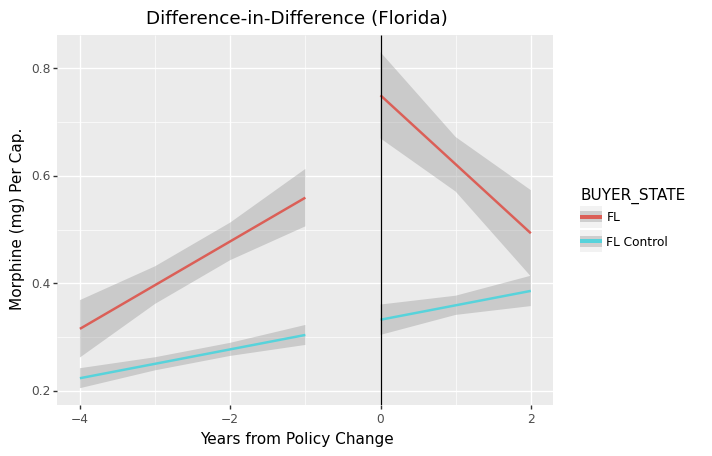

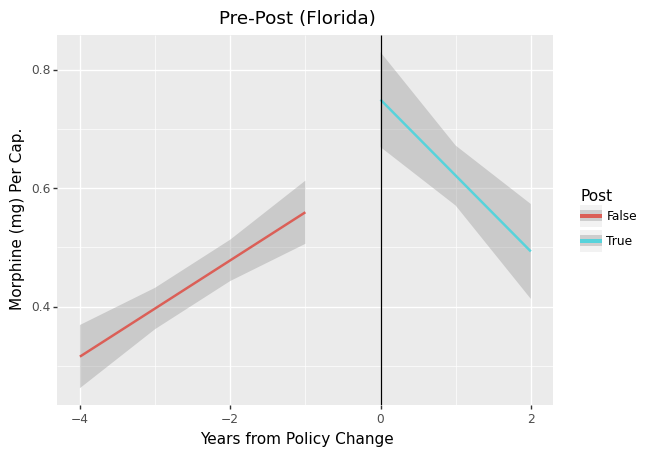

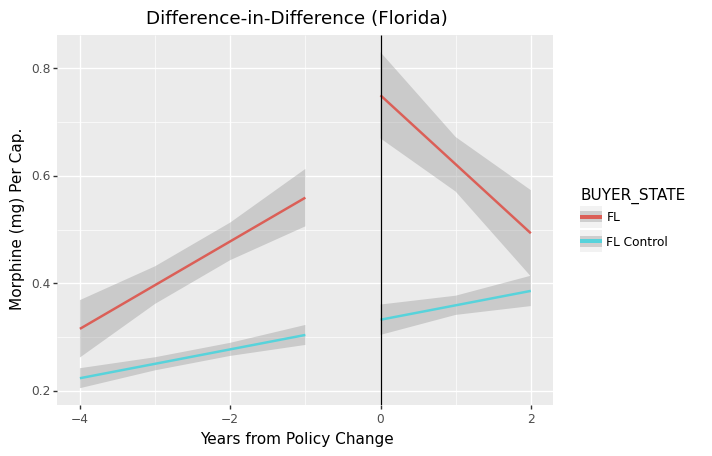

In [84]:
(
    ggplot(
        FL_data.loc[
            FL_data.BUYER_STATE == "FL",
        ],
        aes(x="Year", y="MME/CAP", color="Post"),
    )
    + geom_smooth(method="lm")
    + geom_vline(aes(xintercept=0))
    + theme(
        plot_title=element_text(text="Pre-Post (Florida)"),
        axis_title_x=element_text(text="Years from Policy Change"),
        axis_title_y=element_text(text="Morphine (mg) Per Cap."),
    )
).draw()  # .save("../30_results/FL_Pre_Post.jpg")

(
    ggplot(FL_data, aes(x="Year", y="MME/CAP", color="BUYER_STATE", shape="Post"))
    + geom_smooth(method="lm")
    + geom_vline(aes(xintercept=0))
    + theme(
        plot_title=element_text(text="Difference-in-Difference (Florida)"),
        axis_title_x=element_text(text="Years from Policy Change"),
        axis_title_y=element_text(text="Morphine (mg) Per Cap."),
    )
).draw()  # .save("../30_results/FL_DIFinDIF.jpg")

In [85]:
WA_compare = ["WA", "CO", "OR", "CA"]
TX_compare = ["TX", "KS", "AR", "NM"]
compares = [WA_compare, TX_compare]
yr_before = [2010, 2006]
reform_year = [2011, 2007]
yr_after = [2012, 2008]
num_months = 24

In [86]:
monthly = ship_pop.loc[
    (ship_pop.BUYER_STATE.isin(WA_compare + TX_compare)),
    ["BUYER_STATE", "YEAR/MONTH", "MME/CAP", "Post"],
].reset_index(drop=True)
monthly["Month"] = monthly["YEAR/MONTH"].apply(lambda x: int(str(x)[4:]))
monthly["Year"] = monthly["YEAR/MONTH"].apply(lambda x: int(str(x)[:4]))
monthly.drop("YEAR/MONTH", axis=1, inplace=True)

monthly.head()

,BUYER_STATE,MME/CAP,Post,Month,Year
0,AR,0.0198,False,1,2006
1,AR,0.0149,False,2,2006
2,AR,0.0203,False,3,2006
3,AR,0.0168,False,4,2006
4,AR,0.0200,False,5,2006


In [87]:
monthly.loc[(monthly.BUYER_STATE == "WA"), "Post"].value_counts()

False    2808
True      468
Name: Post, dtype: int64

In [89]:
print(WA_compare)

['WA', 'CO', 'OR', 'CA']


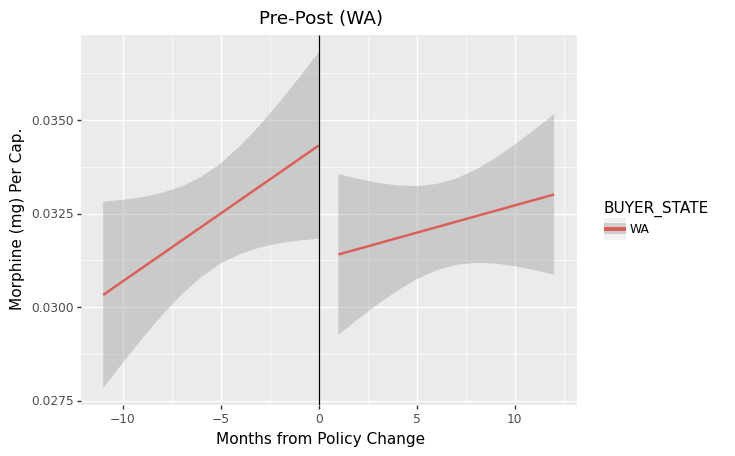

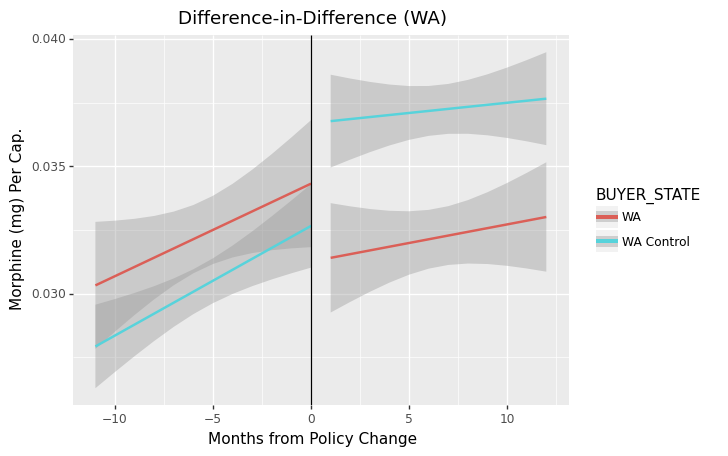

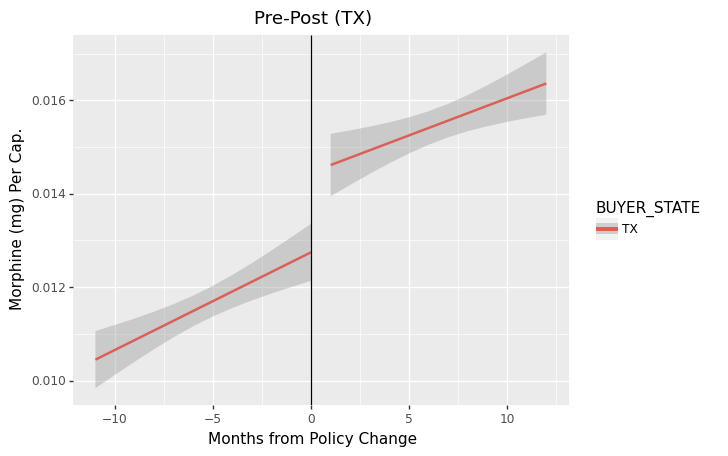

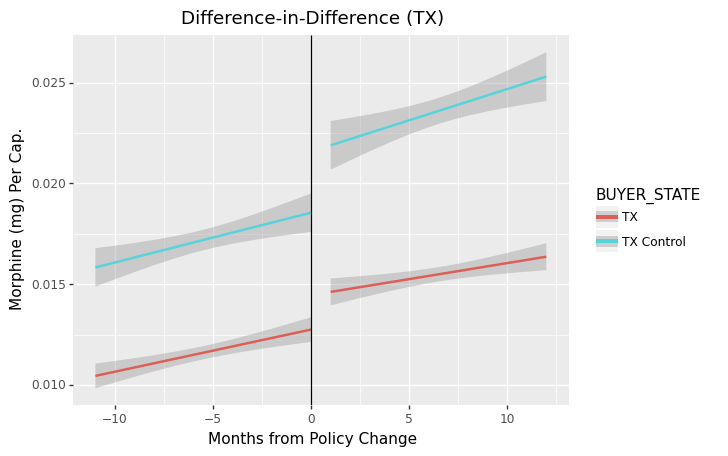

In [93]:
for i in range(len(compares)):
    data = monthly.loc[
        (monthly.BUYER_STATE.isin(compares[i]))
        & (
            (monthly.Year >= yr_before[i])
            & (monthly.Year != reform_year[i])
            & (monthly.Year <= yr_after[i])
        )
    ].copy()
    data.loc[
        data.BUYER_STATE != compares[i][0], "BUYER_STATE"
    ] = f"{compares[i][0]} Control"
    #    assert len(
    #        data.loc[data.BUYER_STATE != compares[i][0], "BUYER_STATE"]
    #    ) == num_months * len(compares[i][1:])
    #    data = (
    #        data[["BUYER_STATE", "Year", "Month", "MME/CAP", "Post"]]
    #        .groupby(["BUYER_STATE", "Year", "Month"])
    #        .mean()
    #        .sort_values(by=["Post", "Month"])
    #        .reset_index()
    #    )
    #    assert (
    #        len(
    #            data.loc[
    #                data.BUYER_STATE != compares[i][0],
    #            ]
    #        )
    #        == num_months
    #    )
    #    assert len(data.loc[data.BUYER_STATE != compares[i][0],]) == len(
    #        data.loc[
    #            data.BUYER_STATE == compares[i][0],
    #        ]
    #    )
    data.loc[(data.Post == False), "Month"] = (
        data.loc[(data.Post == False), "Month"] - 12
    )
    (
        ggplot(
            data.loc[
                data.BUYER_STATE == compares[i][0],
            ],
            aes(x="Month", y="MME/CAP", color="BUYER_STATE", shape="Post"),
        )
        + geom_smooth(method="lm")
        + geom_vline(aes(xintercept=0))
        + theme(
            plot_title=element_text(text=f"Pre-Post ({compares[i][0]})"),
            axis_title_x=element_text(text=f"Months from Policy Change"),
            axis_title_y=element_text(text="Morphine (mg) Per Cap."),
        )
    ).draw()  # .save(f"../30_results/{compares[i][0]}_Pre_Post.jpg")
    (
        ggplot(
            data,
            aes(x="Month", y="MME/CAP", color="BUYER_STATE", shape="Post"),
        )
        + geom_smooth(method="lm")
        + geom_vline(aes(xintercept=0))
        + theme(
            plot_title=element_text(
                text=f"Difference-in-Difference ({compares[i][0]})"
            ),
            axis_title_x=element_text(text=f"Months from Policy Change"),
            axis_title_y=element_text(text="Morphine (mg) Per Cap."),
        )
    ).draw()  # .save(f"../30_results/{compares[i][0]}_DIFinDIF.jpg")